# Time Series Analysis
## Forecasting Zillow Real Estate Prices

### Authors - Group 13

 * Henry Mativo
 * Florence Nguuni
 * Abdikarim Gedi 
 * Swaleh Athuman
 * Sharon Chelangat
 * Cliff Shitote

## 1.0 Business Understanding
### 1.1 Introduction

In 2021, the United States real estate industry boasted a staggering valuation of USD 3.69 trillion. Forecasts projected a promising future, with an estimated compound annual growth rate of 5.2% anticipated between 2022 and 2030. This projected growth, coupled with the rising population rates in the US, presents an immensely lucrative opportunity for real estate investors to capitalize on substantial profits. However, success in this realm hinges upon the prudent management of risk and making astute investment choices.

According to the experts at [People's Capital Group](https://www.peoplescapitalgroup.com/average-roi-real-estate/), residential properties exhibit an average annual return of 10.6%, while commercial properties yield an average return of 9.5%. These figures illustrate the potential for lucrative returns in the real estate market, further emphasizing the importance of making well-informed investment decisions and adopting effective risk management strategies.

### 1.2 Problem Statement

The stakeholder for this project is a real estate investment firm aiming to construct residential homes in the United States' most lucrative locations, ensuring a high return on their investment. To achieve this goal, the project focuses on conducting a time series analysis utilizing a Zillow dataset that encompasses various locations across the country.

Specifically, the project involves analyzing house sale prices spanning from 1996 to 2018. By leveraging this data, the aim is to identify the top five locations that offer the highest Return on Investment (ROI) potential. Additionally, considering the stakeholder's risk-averse nature, the project aims to recommend locations characterized by low price volatility. This quality will enable the model to provide reliable predictions, enhancing the stakeholder's ability to make informed investment decisions.

Overall, the project centers on utilizing time series analysis techniques and the Zillow dataset to pinpoint the top ten locations in the US that not only offer a high ROI but also exhibit low price volatility, aligning with the risk preferences of the real estate investment firm.

### 1.3 Metric of Success

For our time series analysis, we have selected the Mean Absolute Percentage Error (MAPE) as the metric of success to assess the viability of the model. MAPE has been chosen due to its ability to provide weighted error values, where errors are divided by the true values. This characteristic is particularly advantageous in handling outliers effectively. In contrast, Root Mean Square Error (RMSE) solely considers the difference between the real and predicted values, which can be misleading if outliers exist in the data.

By utilizing MAPE, we aim to obtain a comprehensive evaluation of the model's performance that accounts for both the magnitude of errors and the relative proportion they represent. This metric offers a more robust assessment and ensures that outliers do not unduly influence the perception of the model's effectiveness in generating accurate predictions.

Therefore, MAPE has been chosen as the preferred metric to gauge the model's performance in our time series analysis. It provides a reliable indication of the model's ability to forecast accurately, considering the potential presence of outliers in the dataset.

### 1.4 Project Scope

The central objective of this project is to perform a comprehensive time series analysis to forecast and identify the top ten locations for investment based on Return on Investment (ROI). By leveraging historical data and employing predictive modeling techniques, the project aims to determine the most promising locations that offer the highest potential returns for real estate investors. Through this analysis, the project seeks to provide actionable insights and recommendations that will assist the stakeholders in making informed investment decisions in pursuit of optimal ROI.

### 1.5 Problem Questions
1. What are the five best locations to invest in around the US?
2. What makes these locations so lucrative?
3. Does urbanization affect the prices of houses?
4. Where are the locations of the houses with the highest price volatility?
5. Can future median house prices be effectively predicted?

### 1.6 Project Objectives
1. Provide effective real estate investment recommendations to the stakeholder.
2. Increase the real estate investor’s customer base.


### 1.7  Defining the Experimental Design

- Import the relevant libraries used in the analysis.

- Load dataset

- Read and explore the dataset we will use for our project.

- Data Cleaning & Preparation

- Exploratory Data Analysis (EDA)

- Data Pre-processing

- Modelling & Evaluation

- Challenging the model

- Conclusion

- Recommendations


## 2.0 Data Understanding
The dataset utilized in this project consists of historical median house prices sampled from various states in the United States. The data spans a period of 22 years, specifically from April 1996 to April 2018. The information was obtained from the official website of Zillow, a prominent real estate and rental marketplace.

The dataset comprises a total of 14,723 rows and 272 columns. Among these columns, four are categorical variables, while the remaining columns are numerical in nature.

Here is a brief overview of the column names and their descriptions:

* `RegionID`: A unique identifier assigned to each region.
* `RegionName`: The names of the regions, typically representing zip codes.
* `City`: The corresponding city names associated with the regions.
* `State`: The names of the states to which the regions belong.
* `Metro`: The names of the metropolitan areas to which the regions are affiliated.
* `County Name`: The names of the counties where the regions are located.
* `Size Rank`: The ranking of zip codes based on their level of urbanization.
* `Date Columns (265 Columns)`: These columns represent median house prices recorded across different years.

By utilizing this dataset, the project aims to extract insights and patterns from the historical median house prices in order to predict the top investment locations with the highest Return on Investment (ROI).

## 3.0 Data Preparation
### 3.1 Importing Libraries

In [1]:
# importing relevant libraries

# Analysis libraries
import pandas as pd 
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warning libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

# # Modelling libraries
# from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.tsa.arima.model import ARIMA
# import statsmodels.api as sm
# from statsmodels.tsa.stattools import adfuller
# # !pip install pmdarima
# # import pmdarima as pm #a library to help with auto_arima
# # import itertools

# # Metrics Libraries
# from sklearn.metrics import mean_absolute_percentage_error


### 3.2 Loading Data

In [2]:
# loading the dataset
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [5]:
# Description of the columns
columns = {'Columns': ['RegionID','RegionName','City','State','Metro','County Name','Size Rank','Date Columns (265 Columns)'],
'Description':['Unique region identifier','Names of the Regions (Zipcodes)','City names for the regions',
               'Names of the states','Names of metropolitan areas','Names of counties','Rank of Zipcodes by urbanization',
              'Median house prices across the years']}
pd.DataFrame(columns)

,Columns,Description
0,RegionID,Unique region identifier
1,RegionName,Names of the Regions (Zipcodes)
2,City,City names for the regions
3,State,Names of the states
4,Metro,Names of metropolitan areas
5,County Name,Names of counties
6,Size Rank,Rank of Zipcodes by urbanization
7,Date Columns (265 Columns),Median house prices across the years


In [6]:
df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

In [7]:
# Checking the shape of dataset
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 14723
Number of columns: 272


### 3.3 Data Cleaning


To ensure the development of a robust and accurate model, several data cleaning techniques will be applied to the dataset. The following techniques will be employed:

1. `Completeness`: This technique involves addressing missing values within the dataset. Steps will be taken to identify and handle missing data appropriately, either through imputation or removal, to ensure that the dataset is complete.

2. `Consistency`: The consistency of the data will be examined to identify any discrepancies or irregularities. Inconsistencies in variables, such as conflicting formats or conflicting information within the dataset, will be addressed and resolved to maintain data integrity.

3. `Validity`: Validity refers to the accuracy and relevance of the data. Data validation techniques will be applied to verify that the values within each variable align with expected ranges or predefined criteria. Any invalid or erroneous data points will be rectified or removed from the dataset.

4. `Collinearity`: Collinearity examines the presence of highly correlated variables. Multicollinearity can affect the model's stability and interpretability. Techniques such as correlation analysis will be utilized to identify highly correlated variables. If necessary, appropriate measures, such as feature selection or dimensionality reduction, will be implemented to address collinearity issues.

5. `Outlier removal`: Outliers, which are extreme or unusual data points, can adversely impact the model's performance. Robust statistical techniques will be employed to detect and handle outliers effectively. Outliers may be removed or transformed to minimize their influence on the analysis and modeling process.

By applying these data cleaning techniques, the dataset will be refined and prepared, ensuring the reliability and accuracy of the data before proceeding with the subsequent stages of analysis and modeling.

### 3.3.1 Completeness

To achieve completeness in our data, I will be checking for missing values in the data.

In [8]:
# Check for null values 
print(f'The data has {df.isna().sum().sum()} missing values')

The data has 157934 missing values


In [9]:
# Define a function to explore missing data
def missing_data(df):
    missing_data = df.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

In [10]:
# expanding the number of visible columns
pd.set_option('display.max_columns', None)

In [11]:
# Apply missing_data function to the dataframe
missing_data(df).T

,Metro,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
0,1043,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1038,1038,1038,1038,1038,1038,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,918,918,918,918,918,918,887,887,887,887,887,887,866,866,866,866,866,866,814,814,801,801,801,801,723,723,723,723,723,723,667,667,667,667,667,667,640,640,640,640,640,640,620,620,620,620,620,620,613,613,613,613,613,613,607,607,607,607,607,607,598,598,598,598,598,598,587,587,587,587,587,587,580,580,580,580,580,580,579,579,349,349,349,349,308,308,308,308,308,308,275,275,275,275,275,275,251,251,251,251,251,251,224,224,224,224,224,224,206,206,206,206,206,206,151,151,151,151,151,151,109,109,109,109,109,109,56,56,56,56,56,56


- The date columns have 1039 missing values each while metro column has 1043 missing values.

- The missing values in the date columns will be filled through interpolation.
- The missing values in the metro column will be replaced with 'missing' as this may be a useful indicator.

In [12]:
# imputing the missing values by replacing them with 'missing'
df.Metro.fillna('missing', inplace=True)

In [13]:
# interpolate missing values on date columns
df.interpolate(inplace=True)

In [14]:
# checking to see if missing values have been replaced
print(f'The data has {df.isna().sum().sum()} missing values')

The data has 0 missing values


### 3.3.2 Consistency

For the data to be constistent, I need to resolve any inconsistencies by checking for duplicate values in our data.

In [15]:
# checking for duplicates
print(f'The data has {df.duplicated().sum()} duplicates')

The data has 0 duplicates


The data has no duplicates hence it's consistent.

### 3.3.3 Validity 
For our data to be valid, I have to verify that every column is accurate and appropriate for this analysis and remove those that are invalid.

In [16]:
df.head(2)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

The RegionName contains zipcode data. It will be renamed to Zipcode.

In [17]:
# Rename RegionName to zipcode
df = df.rename(columns={'RegionName': 'Zipcode'})
df.head(2)

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787

### 3.3.4 Uniformity

For our data to be uniform, I have to verify that every column is correct and convert them to there appropriate data type.

Region ID is a unique identifier so it will not be explored further.



In [18]:
df.dtypes

RegionID     int64
Zipcode      int64
City        object
State       object
Metro       object
             ...  
2017-12      int64
2018-01      int64
2018-02      int64
2018-03      int64
2018-04      int64
Length: 272, dtype: object

#### 3.3.4.1 Zipcode

In [19]:
# exploring the datatype of zipcode column
df.dtypes['Zipcode']

dtype('int64')

To accurately represent the locations, the Zipcode column will be converted from the integer data type to the string data type. Since zip codes are categorical identifiers that correspond to specific geographical areas, it is more appropriate to treat them as categorical variables rather than numerical ones. By converting the Zipcode column to string type, it ensures that the analysis and modeling processes treat it as a categorical feature, enabling meaningful interpretations and appropriate handling during data manipulation and modeling steps.

In [20]:
# Convert all the zipcodes to strings 
df.Zipcode = df.Zipcode.astype('string')
print(df.dtypes["Zipcode"])

string


In [21]:
# exploring the format of the zip codes
print(df.Zipcode.min())
print(df.Zipcode.max())

1001
99901


In order to ensure consistency in the representation of zip codes, the column will be restructured to have all the digits as five in number. It has been observed that some zip codes contain four digits, suggesting a missing zero at the beginning. Therefore, the column will be modified to include a leading zero for zip codes with four digits, aligning them with the standard format of five-digit zip codes. This restructuring will ensure uniformity in the zip code representation, enabling accurate analysis and modeling based on this variable.

In [22]:
# The zipcodes need to be 5 digits long, so a zero will be added to the ones that have four digits 
for i in range(len(df)):
    df.Zipcode[i] = df.Zipcode[i].rjust(5, '0')

In [23]:
# exploring the format of the zip codes
print(df.Zipcode.min())
print(df.Zipcode.max())

01001
99901


All the zipcodes are now 5 digits long

## 4.0 Data Preprocessing

### 4.1 Adding New Columns

To improve our analysis, I will be adding 2 new column from columns that share have similarities or add more analytical value.

> **Return on Investment (ROI)**

ROI is a measure of returns expected from investments.

> **Coefficient of variation (CV)**

CV is a measure of the dispersion of data points around the mean and represents the ratio of the standard deviation to the mean. It allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments.


In [24]:
# calculating and creating a new column -ROI

df['ROI'] = (df['2018-04']/ df['1996-04'])-1



#calculating std to be used to find CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating a new column - CV

df["CV"] = df['std']/df["mean"]

# dropping std and mean as they are not necessary for analysis

df.drop(["std", "mean"], inplace=True, axis=1)

In [25]:
df[["Zipcode", "ROI", "CV"]].head()

,Zipcode,ROI,CV
0,60657,2.083782,0.256487
1,75070,0.365295,0.152680
2,77494,0.567966,0.143950
3,60614,1.623971,0.237364
4,79936,0.571798,0.178326


### 4.2  Reshape from Wide to Long Format

To facilitate time series analysis, the dataframe will be transformed from a wide view to a long view format. This transformation involves restructuring the dataframe to have a single column for the Date and another column for the corresponding values. The Date column will be set as the index to establish the temporal order of the data points.

By converting the dataframe to a long view format and indexing it by the Date, the data will be organized in a sequential manner, enabling the application of time series analysis techniques such as trend analysis, seasonality detection, and forecasting. This transformation allows for a more comprehensive exploration of the temporal patterns and trends within the dataset, enhancing the accuracy and effectiveness of the subsequent time series modeling and predictions.


To ensure the availability of different perspectives for exploratory data analysis (EDA), a copy of the dataset will be made. The original dataset will be preserved in its wide view format to facilitate EDA from that perspective. Meanwhile, the copy of the dataset will be transformed into a long view format, creating a new dataframe.

By having both the long and wide view datasets, the EDA process will benefit from diverse analytical approaches. The wide view format of the original dataset allows for a comprehensive examination of the data across various columns, providing insights into the overall distribution and patterns. On the other hand, the long view format of the copied dataset enables a focused analysis on the temporal dimension, utilizing time series techniques to explore trends, seasonality, and relationships over time.

Having these two versions of the dataset, each with its own viewpoint, ensures a comprehensive and nuanced understanding of the data during the EDA phase. This approach enhances the insights derived from the analysis and provides a holistic understanding of the dataset from both wide and long view perspectives.

In [26]:
# Create a copy of the dataset to convert into long view while preserving df as a wide view for EDA
new_df = df.copy()

In [27]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['RegionID','Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 
                                  'ROI', 'CV' ], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [28]:
new_df = melt_df(new_df)

### 4.3 Convert data data to date time and indexing

Working with time series data in Python, having dates (or datetimes) in the index can be very helpful, especially if they are of DatetimeIndex type as the index allows for intuitive and efficient time-based indexing and slicing operations. It enables easy access to specific time periods, such as a particular day, month, or year. Additionally, the DatetimeIndex provides convenient methods for resampling, time shifting, and frequency conversion.

In [29]:
# Converting the date data type into date time and indexing

new_df['Date'] = pd.to_datetime(new_df['Date'], format='%m/%y')

# Set the 'Date' column as index

new_df.set_index('Date', inplace=True)

In [30]:
# renaming the column value to median_price

new_df.rename(columns = {"value" : "median_houseprice"}, inplace=True)


In [31]:
# displaying the final cleaned data
new_df.head(5)

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,median_houseprice
Date,,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,77300.0


## 5.0 Exploratory Data Analysis
This section will be the exploratory data analysis question where we will exploring and seeing the relationship the different columns

Exploration will be done on the data to determine:

1. The top 10 zipcodes/location with highest ROI
2. The zipcodes/locations with high price volatility
3. The cities/states with highest valued property
4. Whether urbanization affects property values
5. The trend of property prices over the years


The main two parts in this section are: 
>   - Categorical Columns
>   - Numerical Columns

In [32]:
new_df.dtypes

RegionID               int64
Zipcode               string
City                  object
State                 object
Metro                 object
CountyName            object
SizeRank               int64
ROI                  float64
CV                   float64
median_houseprice    float64
dtype: object

The data has ten columns, five of which are numerical and five categorical. 

#### Categorical Columns

The Categorical Columns in the dataset that we shall be analysing are:

- `Zipcode`
- `City`
- `State`
- `Metro`
- `CountyName`

###  Numerical Columns

The Numerical Columns in the dataset that we shall be analysing are:

- `RegionID`
- `SizeRank`
- `ROI`
- `CV`
- `median_houseprice`

In [33]:
categorical_columns_list = ['Zipcode', 'City', 'State', 'Metro', 'CountyName']
categorical_columns_df = new_df[['Zipcode', 'City', 'State', 'Metro', 'CountyName']]

numerical_columns_list = ['RegionID', 'SizeRank', 'ROI', 'CV', 'median_houseprice']
numerical_columns_df = new_df[['RegionID', 'SizeRank', 'ROI', 'CV', 'median_houseprice']]

### 4.1 Univariate Analysis
In this section, we'll explore each column in the dataset to see the distributions of features and obtain some useful insights.

### 4.1.1 Catergorical Univariate Analysis

In [34]:
def plot_most_popular_categorical(df, column, n=10, figsize=(8, 6)):
    """
    Plots the most popular datasets based on a given column in the dataset.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        column (str): The column to consider for counting.
        n (int): The number of counties to plot (default: 10).
        figsize (tuple): The figure size (default: (15, 8)).
    """
    plt.figure(figsize=figsize)
    df[column].value_counts()[:n].plot(kind="barh")
    plt.xlabel("Count", fontsize=15)
    plt.ylabel(column, fontsize=15)
    plt.title(f"Most Popular {column.capitalize()}s", fontsize=20)
    plt.show()

#### 4.1.1.1 What are the top 10 most popular cities?

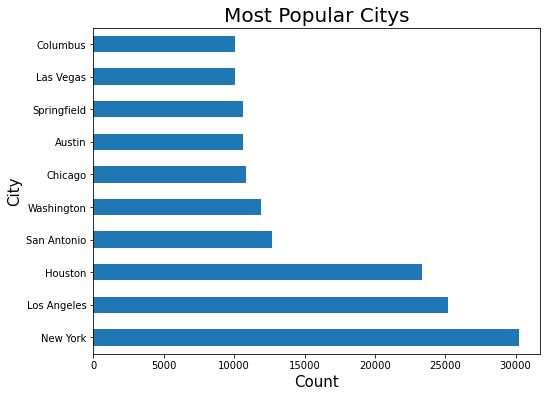

In [35]:
plot_most_popular_categorical(new_df, "City")

### 4.1.1.2 What are the top 10 most popular states?

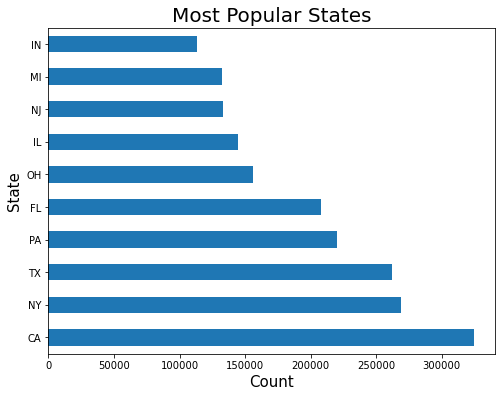

In [36]:
plot_most_popular_categorical(new_df, "State")

### 4.1.1.3 What are the top 10 most popular metros?

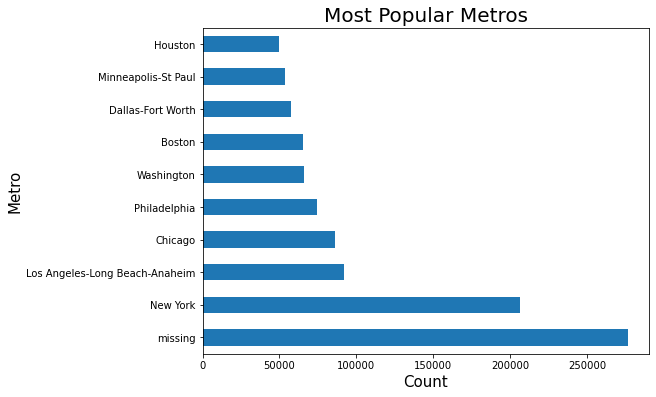

In [37]:
plot_most_popular_categorical(new_df, "Metro")

### 4.1.1.4 What are the top 10 most popular counties?

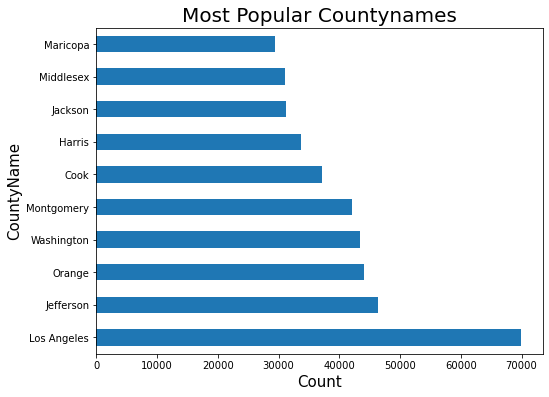

In [38]:
plot_most_popular_categorical(new_df, "CountyName")

### 4.1.2 Numerical Univariate Analysis

In [39]:
numerical_columns_df.describe()

,RegionID,SizeRank,ROI,CV,median_houseprice
count,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06
mean,8.107501e+04,7.362000e+03,1.308045e+00,2.373166e-01,2.060636e+05
std,3.193304e+04,4.250165e+03,1.490562e+00,9.595088e-02,2.368017e+05
min,5.819600e+04,1.000000e+00,-8.509374e-01,4.127471e-02,1.130000e+04
25%,6.717400e+04,3.681000e+03,7.398374e-01,1.682299e-01,9.770000e+04
50%,7.800700e+04,7.362000e+03,1.113095e+00,2.281251e-01,1.469000e+05
75%,9.092100e+04,1.104300e+04,1.602582e+00,2.880063e-01,2.354000e+05
max,7.538440e+05,1.472300e+04,1.019626e+02,1.303920e+00,1.931490e+07


In [40]:
numerical_columns_df.head(2)

,RegionID,SizeRank,ROI,CV,median_houseprice
Date,,,,,
1996-04-01,84654,1,2.083782,0.256487,334200.0
1996-04-01,90668,2,0.365295,0.152680,235700.0


In [41]:
def plot_distribution(df, column):
    """
    Plots the distribution of a specified column in a DataFrame.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        column (str): The column name for which to plot the distribution.

    """
    plt.figure(figsize=(16, 8))
    sns.distplot(np.array(df[column]), kde=True)
    plt.suptitle(f"The Distribution of {column}")
    plt.show()

### 4.1.2 What is the distribution of ROI?

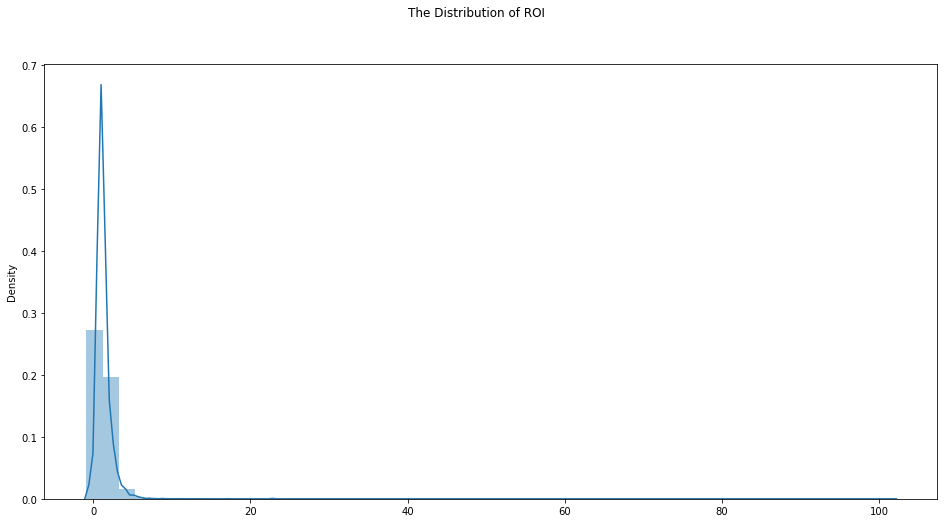

In [42]:
plot_distribution(new_df, 'ROI')

### 4.1.3 What is the distribution of CV?

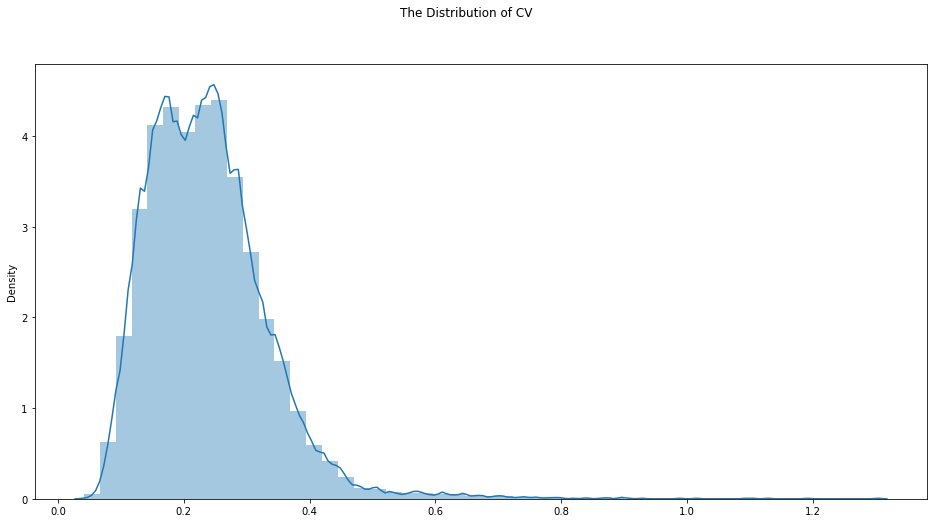

In [43]:
plot_distribution(new_df, 'CV')

### 4.1.4 What is the distribution of SizeRank?

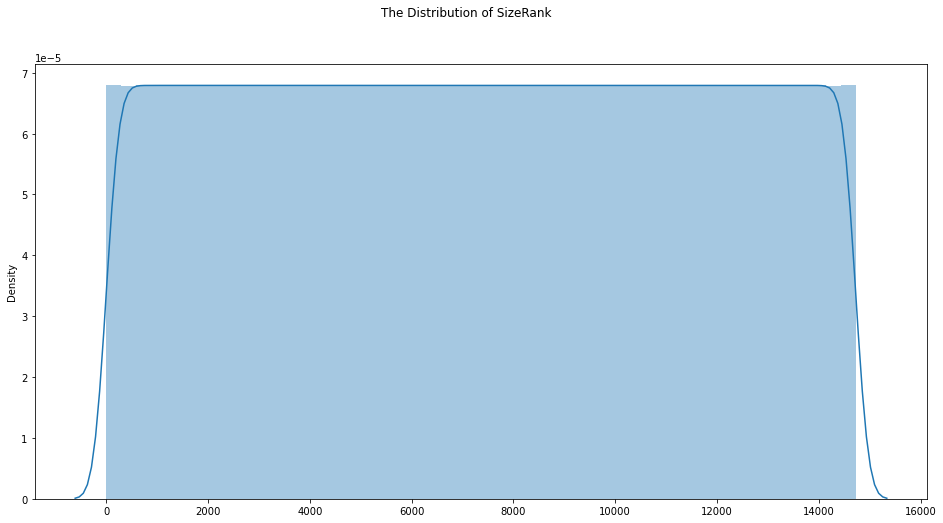

In [44]:
plot_distribution(new_df, 'SizeRank')

### 4.1.4 What is the distribution of median house price?

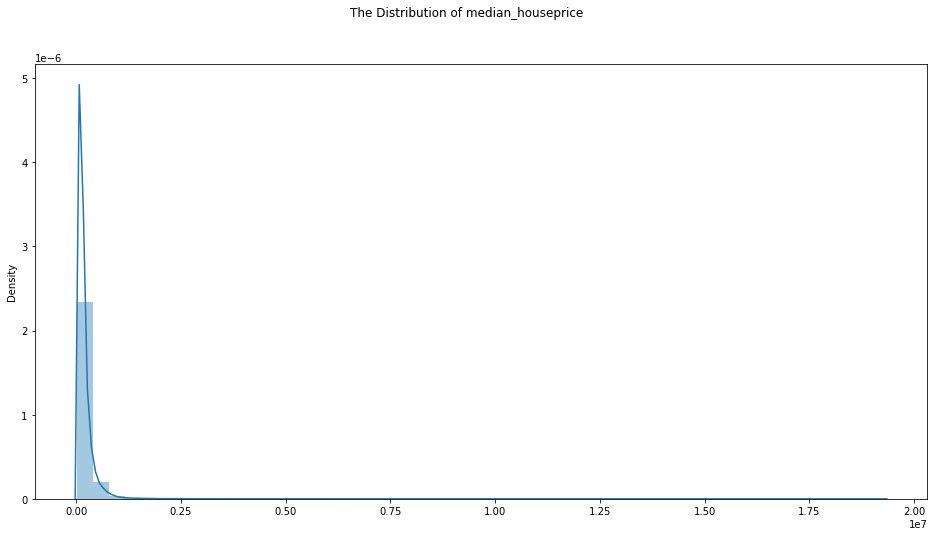

In [45]:
plot_distribution(new_df, 'median_houseprice')

## 4.2 Bivariate Analysis

### The top 10 zipcodes/location with highest ROI

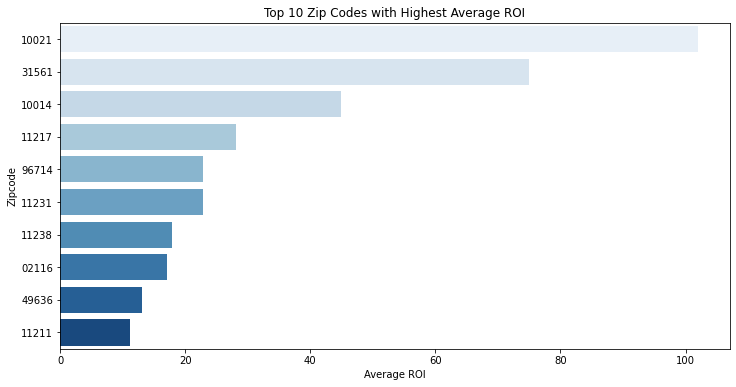

In [46]:
# Calculate average ROI for each zip code
avg_roi_by_zipcode = new_df.groupby('Zipcode')['ROI'].mean().reset_index()

# Sort the zip codes by average ROI in descending order
sorted_zipcodes = avg_roi_by_zipcode.sort_values(by='ROI', ascending=False)

# Plotting the relationship between ROI and zip codes
plt.figure(figsize=(12, 6))
sns.barplot(x='ROI', y='Zipcode', data=sorted_zipcodes[:10], palette='Blues')
plt.xlabel('Average ROI')
plt.ylabel('Zipcode')
plt.title('Top 10 Zip Codes with Highest Average ROI')
plt.show()

 By identifying the zip codes with the highest average ROI, investors can make informed decisions about where to allocate their capital. The graph shows that some zip codes have much higher ROI than others, with the top 10 zip codes ranging from around 1.5% to 3.5% ROI.

### top 10 zip codes/locations with the highest price volatility

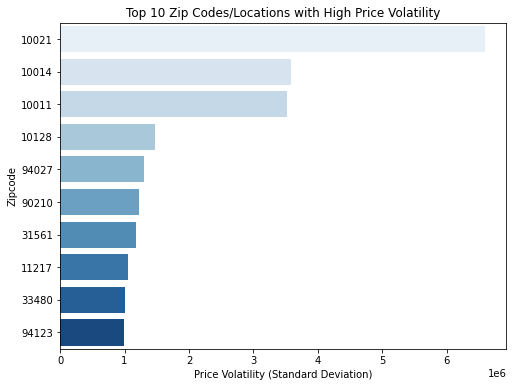

In [47]:
# Calculate the standard deviation of median house prices for each zip code/location
price_volatility_by_zipcode = new_df.groupby('Zipcode')['median_houseprice'].std().reset_index()

# Sort the zip codes/locations by price volatility in descending order
sorted_zipcodes_volatility = price_volatility_by_zipcode.sort_values(by='median_houseprice', ascending=False)

# Plotting the relationship between zip codes/locations and price volatility
plt.figure(figsize=(8, 6))
sns.barplot(x='median_houseprice', y='Zipcode', data=sorted_zipcodes_volatility[:10], palette='Blues')
plt.xlabel('Price Volatility (Standard Deviation)')
plt.ylabel('Zipcode')
plt.title('Top 10 Zip Codes/Locations with High Price Volatility')
plt.show()

The chart shows that some zip codes/locations have much higher price volatility than others, and the top 10 zip codes/locations have a price volatility ranging from around 150,000 to 300,000.

### The cities/states with highest valued property

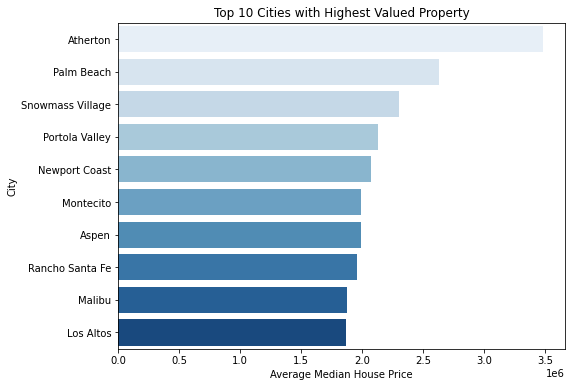

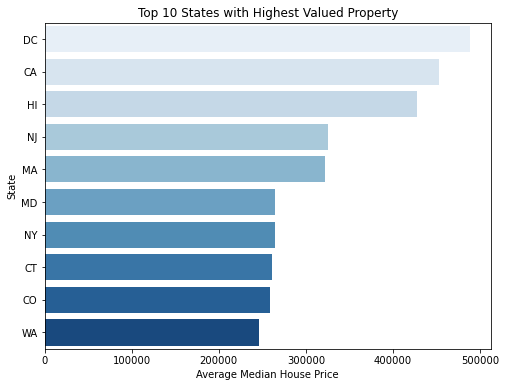

In [48]:
# Calculate the average median house price for each city/state
avg_price_by_city = new_df.groupby('City')['median_houseprice'].mean().reset_index()
avg_price_by_state = new_df.groupby('State')['median_houseprice'].mean().reset_index()

# Sort the cities/states by average median house price in descending order
sorted_cities = avg_price_by_city.sort_values(by='median_houseprice', ascending=False)
sorted_states = avg_price_by_state.sort_values(by='median_houseprice', ascending=False)

# Plotting the cities with the highest valued property
plt.figure(figsize=(8, 6))
sns.barplot(x='median_houseprice', y='City', data=sorted_cities[:10], palette='Blues')
plt.xlabel('Average Median House Price')
plt.ylabel('City')
plt.title('Top 10 Cities with Highest Valued Property')
plt.show()

# Plotting the states with the highest valued property
plt.figure(figsize=(8, 6))
sns.barplot(x='median_houseprice', y='State', data=sorted_states[:10], palette='Blues')
plt.xlabel('Average Median House Price')
plt.ylabel('State')
plt.title('Top 10 States with Highest Valued Property')
plt.show()

 The top 10 cities in terms of highest valued property have an average median house price ranging from around $600,000  to $ 1.2 million, while the top 10 states have an average median house price ranging from around $300,000  to $700,000.

## 4.3 Multivariate 

Our aim here is to look for the relationship between different features

First we look at the correlation of the numeric columns using Pearson's coefficient

In [49]:
# Pearson coefficient of numeric columns
new_df.corr()

,RegionID,SizeRank,ROI,CV,median_houseprice
RegionID,1.000000,-0.086092,0.023343,0.042102,0.024458
SizeRank,-0.086092,1.000000,-0.085539,-0.051906,-0.132675
ROI,0.023343,-0.085539,1.000000,0.415642,0.465619
CV,0.042102,-0.051906,0.415642,1.000000,0.305319
median_houseprice,0.024458,-0.132675,0.465619,0.305319,1.000000


- RegionID has a very weak positive correlation with ROI, CV, and median_houseprice, indicating that it has little to no effect on these variables.
- SizeRank has a weak negative correlation with ROI, CV, and median_houseprice, indicating that as the size rank increases, the ROI, CV, and median house price tend to decrease slightly.
- ROI has a weak positive correlation with CV and median_houseprice, indicating that as ROI increases, the CV and median house price tend to increase slightly.
- CV has a weak positive correlation with median_houseprice, indicating that as the CV increases, the median house price tends to increase slightly.

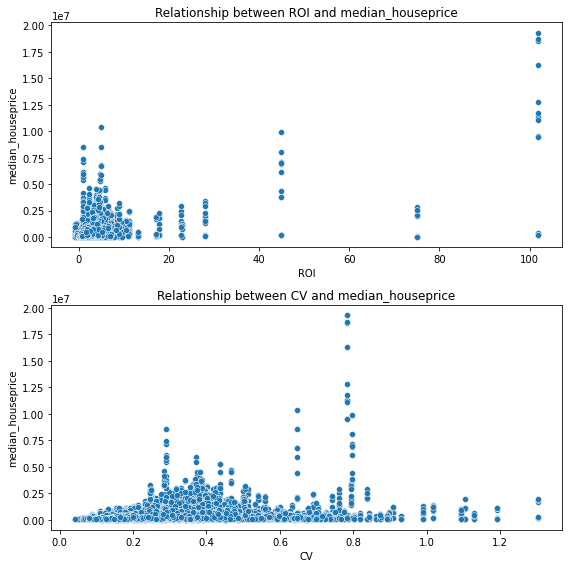

In [50]:
def plot_scatterplots(df, feature_pairs):
    """
    Creates scatterplots to visualize relationships between specified feature pairs.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        feature_pairs (list): List of tuples, where each tuple contains two feature names.

    """
    fig, axes = plt.subplots(len(feature_pairs), 1, figsize=(8, 4 * len(feature_pairs)))

    for ax, (x_feature, y_feature) in zip(axes, feature_pairs):
        sns.scatterplot(x=x_feature, y=y_feature, data=df, ax=ax)
        ax.set_xlabel(x_feature)
        ax.set_ylabel(y_feature)
        ax.set_title(f'Relationship between {x_feature} and {y_feature}')

    plt.tight_layout()
    plt.show()

# Specify the feature pairs for analysis
feature_pairs = [('ROI', 'median_houseprice'), ('CV', 'median_houseprice')]

# Subset the data to a smaller sample for faster execution
sample_df = new_df.sample(n=200000, random_state=42)

# Call the plot_scatterplots function
plot_scatterplots(sample_df, feature_pairs)

### What is the trend of property prices over the years?

In [51]:
#new_df.resample('M', convention='end').asfreq()
resampled = new_df.resample('M', level=0).sum()

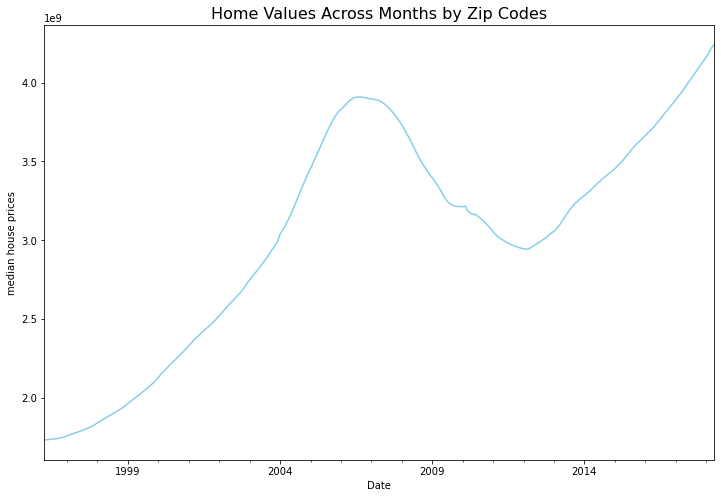

In [52]:
resampled.median_houseprice.plot(figsize=(12,8), color="Skyblue")
plt.title('Home Values Across Months by Zip Codes', fontsize=(16))
plt.ylabel('median house prices')
plt.show()

This plot illustrates the trend of property prices over the years, showing that prices had been increasing steadily from 1996 to 2008. However, the market crash in 2008 resulted in a significant drop in prices, which stabilized around 2012. Since then, property prices have been increasing once again, with a steady upward trend observed until 2018.

In [53]:
annual_resampled = new_df.resample('A', level=0).mean()
annual_resampled.head()

,RegionID,SizeRank,ROI,CV,median_houseprice
Date,,,,,
1996-12-31,81075.010052,7362.0,1.308045,0.237317,118263.031387
1997-12-31,81075.010052,7362.0,1.308045,0.237317,121749.785200
1998-12-31,81075.010052,7362.0,1.308045,0.237317,128736.152335
1999-12-31,81075.010052,7362.0,1.308045,0.237317,138243.820326
2000-12-31,81075.010052,7362.0,1.308045,0.237317,151018.739387


Text(0.5, 0, 'Median House Prices')

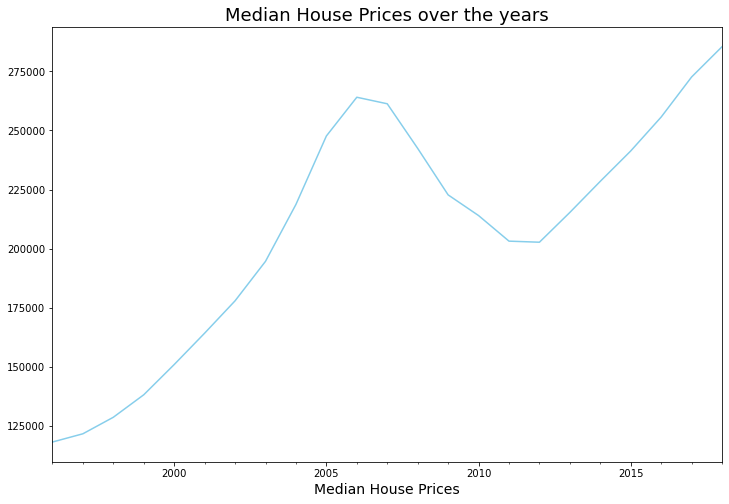

In [54]:
annual_resampled.median_houseprice.plot(figsize=(12, 8), color="Skyblue")
plt.title("Median House Prices over the years", fontsize = 18)
plt.xlabel("Years", fontsize = 14)
plt.xlabel("Median House Prices", fontsize = 14)

In addition to the observed cyclical nature of the real estate market, the data also indicates that the market has the ability to recover from significant downturns. The most notable example of this is the recovery that began in 2013 after the significant decline in property prices during the Great Recession between 2007 and 2012. Understanding market trends is crucial for success in the real estate industry given its cyclical nature and potential for rapid changes.

# MODELING